# Description

Profile tests durations for test list.

# Imports

In [1]:
import logging
import re

import matplotlib.pyplot as plt

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hio as hio
import helpers.hprint as hprint

In [2]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-4aaa5ec0-0f3d-44a8-820f-d29487c6ad24.json'
>>ENV<<: is_inside_container=True: code_version=cmamp-1.0.0, container_version=cmamp-1.0.0, is_inside_docker=True, is_inside_ci=False, CI_defined=True, CI=''
>>ENV<<: AM_AWS_PROFILE=True AM_ECR_BASE_PATH=True AM_S3_BUCKET=True AM_TELEGRAM_TOKEN=True AWS_ACCESS_KEY_ID=False AWS_DEFAULT_REGION=False AWS_SECRET_ACCESS_KEY=False GH_ACTION_ACCESS_TOKEN=True
# Git
    branch_name='CmTask640_Measure_duration_of_the_tests'
    hash='81169d525'
    # Last commits:
      * 81169d525 julias   CmTask640: Add test category to plot title                        (   5 hours ago) Wed Dec 1 17:41:09 2021  (HEAD -> CmTask640_Measure_duration_of_the_tests, origin/CmTask640_Measure_duration_of_the_tests)
      * 471f2d227 julias   CMTask640: Profile tests by category                              (   5 hours ago) Wed Dec 1 17:36:07 2021           
     

In [3]:
# `test_list_name` can be "fast_tests", "slow_tests", "superslow_tests",
# and "fast_slow_tests".

config = {"test_list_name": "fast_slow_tests"}

# Functions

In [4]:
def get_profiling_command(test_list_name: str):
    """
    Get command for profiling selected test type.

    Output command needs to be run from the command line outside the
    notebook and container.
    """
    hdbg.dassert_in(
        test_list_name,
        ["fast_tests", "slow_tests", "superslow_tests", "fast_slow_tests"],
    )
    command = f"invoke run_{test_list_name} -p 'dev_scripts --durations 0' 2>&1 | tee tmp.{test_list_name}_profile.txt"
    return command

# Profile

In [5]:
print(get_profiling_command(config["test_list_name"]))

invoke run_fast_slow_tests -p 'dev_scripts --durations 0' 2>&1 | tee tmp.fast_slow_tests_profile.txt


You need to post this command to the terminal and wait for the tests to pass.

In [6]:
test_output = hio.from_file(f"/app/tmp.{config['test_list_name']}_profile.txt")

In [7]:
print(test_output)

INFO: > cmd='/data/julias/src/venv/amp.client_venv/bin/invoke run_fast_slow_tests --stage local -p dev_scripts --durations 0'
>>ENV<<: is_inside_container=False: code_version=None, container_version=None, is_inside_docker=False, is_inside_ci=False, CI_defined=False, CI='nan'
>>ENV<<: AM_AWS_PROFILE=True AM_ECR_BASE_PATH=True AM_S3_BUCKET=True AM_TELEGRAM_TOKEN=True AWS_ACCESS_KEY_ID=False AWS_DEFAULT_REGION=False AWS_SECRET_ACCESS_KEY=False GH_ACTION_ACCESS_TOKEN=False
>>ENV<<: is_inside_container=False: code_version=None, container_version=None, is_inside_docker=False, is_inside_ci=False, CI_defined=False, CI='nan'
>>ENV<<: AM_AWS_PROFILE=True AM_ECR_BASE_PATH=True AM_S3_BUCKET=True AM_TELEGRAM_TOKEN=True AWS_ACCESS_KEY_ID=False AWS_DEFAULT_REGION=False AWS_SECRET_ACCESS_KEY=False GH_ACTION_ACCESS_TOKEN=False
## run_fast_slow_tests: 
## run_fast_tests: 
12:20:36 INFO  lib_tasks           : _run_test_cmd                 : 2197: cmd=IMAGE=665840871993.dkr.ecr.us-east-1.amazonaws.com/cma

Let's profile only calls, ignoring setups and teardowns.

In [8]:
durations = re.findall("\n  ==> (.*)s call", test_output)
durations = [float(duration) for duration in durations]
durations

[0.61,
 0.18,
 0.03,
 0.02,
 0.01,
 0.01,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 17.82,
 17.6,
 15.11,
 14.8,
 14.25,
 12.07]

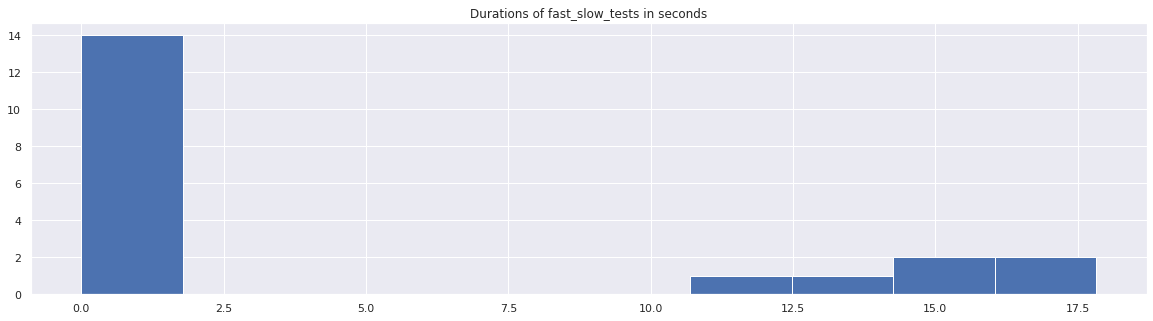

In [9]:
plt.hist(durations)
_ = plt.title(f"Durations of {config['test_list_name']} in seconds")